<a href="https://colab.research.google.com/github/Daffaaq/PCVK_Genap_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 # operasi pengolahan citra dan vision
import numpy as np # melakukan komputasi numerik
from matplotlib import pyplot as plt # membuat plot grafik, citra, histogram, dll

3. SED CROSS 3X3 Tanpa Library

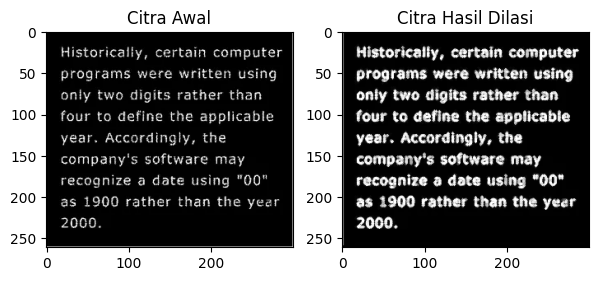

In [4]:
# Input image
input_image = cv2.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/morphology.png') #membaca citra pada path /content/drive/MyDrive/PVCK/Pertemuan 
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY) # mengubah citra yang telah dibaca menjadi citra grayscale menggunakan fungsi cv2.cvtColor() dari OpenCV.

# Membuat structured element berbentuk cr 3x3
sed = np.array([
                  [0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]
              ], dtype=np.uint8)

def morph_dilate(img, kernel): #mendefinisikan sebuah fungsi morph_dilate() yang menerima dua parameter yaitu citra input dan kernel structured element.
    # Menentukan baris dan kolom citra
    rows = img.shape[0] #mendapatkan jumlah baris citra input menggunakan atribut shape dari numpy array.
    cols = img.shape[1] # mendapatkan jumlah kolom citra input menggunakan atribut shape dari numpy array.
    dilate_img=np.zeros((rows,cols)) #membuat numpy array dengan ukuran yang sama dengan citra input, diisi dengan nilai 0, dan digunakan untuk menampung citra hasil dilasi.

    newimg=np.zeros((img.shape[0]+2,img.shape[1]+2)) #membuat numpy array yang lebih besar dari citra input dengan menambahkan 2 baris dan 2 kolom di sisi kanan, kiri, atas, dan bawah, dan diisi dengan nilai 0.
    newimg[1:-1,1:-1]=img #mengisi nilai pada numpy array newimg pada bagian dalam (selain pinggiran) dengan citra input.
    for i in range(0,rows-(kernel.shape[0]-1)): #melakukan iterasi untuk setiap baris citra input (kecuali pinggiran yang tidak dapat diproses).
        for j in range(0,cols-kernel.shape[0]-1): #melakukan iterasi untuk setiap kolom citra input (kecuali pinggiran yang tidak dapat diproses).
            dilate_img[i,j]=np.max(sed * newimg[i:i+kernel.shape[0],j:j+kernel.shape[0]]) #melakukan operasi dilasi dengan mengalikan structured element pada citra input, dan memasukkan nilai maksimum dari hasil perkalian ke dalam dilate_img.

    return dilate_img #mengembalikan citra hasil dilasi.

# Citra hasil dilasi
output_image = morph_dilate(input_image, sed) #memanggil fungsi morph_dilate() dengan parameter citra input dan kernel structured element untuk melakukan operasi dilasi.

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(7,5)) #membuat sebuah figure dengan 1 baris dan 2 kolom subplot dengan ukuran 7x5.

# Menampilkan citra awal
axs[0].set_title("Citra Awal") #memberikan judul pada subplot pertama.
axs[0].imshow(input_image, cmap='gray') # menampilkan citra input pada subplot pertama dengan colormap gray.

# Menampilkan citra hasil dilasi
axs[1].set_title("Citra Hasil Dilasi") #memberikan judul pada subplot kedua.
axs[1].imshow(output_image, cmap='gray') #menampilkan citra input pada subplot kedua dengan colormap gray.

4. SED CROSS 3X3 dengan Library

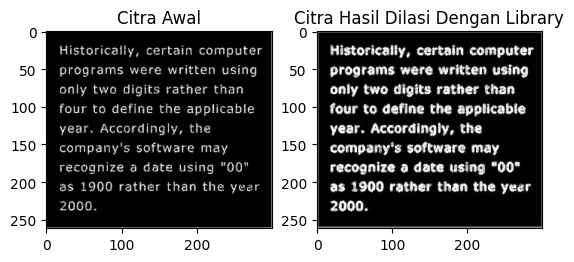

In [9]:
# Dilasi dengan library opencv

# Input image
input_image = cv2.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/morphology.png')

# Membuat structured element berbentuk cr 3x3
cr = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
# Hasil dilasi menggunakan library opencv dilate()
output_image = cv2.dilate(input_image, cr)

# Membuat figure
fig, axs = plt.subplots(1, 2)

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_image)

# Menampilkan citra hasil dilasi
axs[1].set_title("Citra Hasil Dilasi Dengan Library")
axs[1].imshow(output_image)

5. SE Erosi Tanpa Library

(-0.5, 111.5, 149.5, -0.5)

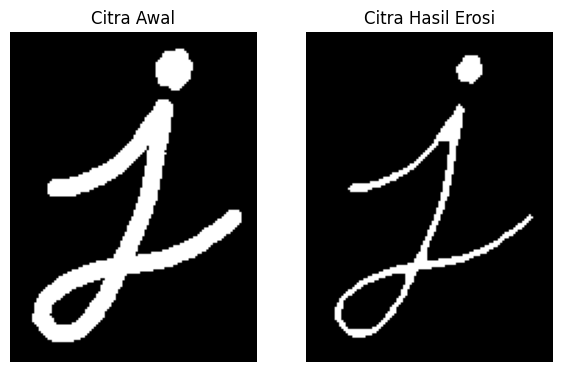

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Input image
input_image = cv2.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/j.png')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Membuat structured element berbentuk square 5x5
se = np.array([[1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1],
               [1, 1, 1, 1, 1]], dtype=np.uint8)

def morph_erode(img, kernel):
    # Menentukan baris dan kolom citra
    rows = img.shape[0]
    cols = img.shape[1]
    
    # Menginisialisasi citra hasil erosi
    eroded_img = np.zeros((rows,cols), dtype=np.uint8)

    # Melakukan padding pada citra input
    padded_img = np.pad(img, pad_width=((2, 2), (2, 2)), mode='constant', constant_values=0)
    
    # Melakukan erosi
    for i in range(2, rows+2):
        for j in range(2, cols+2):
            patch = padded_img[i-2:i+3, j-2:j+3]
            if np.array_equal(patch & kernel, kernel):
                eroded_img[i-2, j-2] = 255
                
    return eroded_img

# Citra hasil erosi
output_image = morph_erode(input_image, se)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(7,5))

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_image, cmap='gray')
axs[0].axis('off')

# Menampilkan citra hasil erosi
axs[1].set_title("Citra Hasil Erosi")
axs[1].imshow(output_image, cmap='gray')
axs[1].axis('off')

6. SE Erosi Dengan Library

(-0.5, 111.5, 149.5, -0.5)

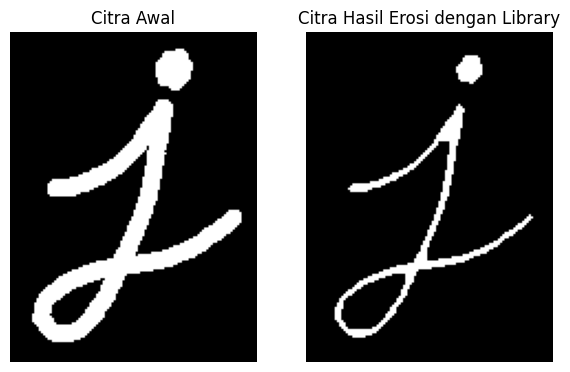

In [13]:
# Input 
input_image = cv2.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/j.png')

# Membuat structured element berbentuk square 5x5
sq = np.ones((5,5))

# Hasil erosi menggunakan library opencv erode()
output_image = cv2.erode(input_image, sq)

# Membuat figure
fig, axs = plt.subplots(1, 2, figsize=(7,5))

# Menampilkan citra awal
axs[0].set_title("Citra Awal")
axs[0].imshow(input_image)
axs[0].axis('off')


# Menampilkan citra hasil erosi
axs[1].set_title("Citra Hasil Erosi dengan Library")
axs[1].imshow(output_image)
axs[1].axis('off')

7. a. SE Square Opening Tanpa Library

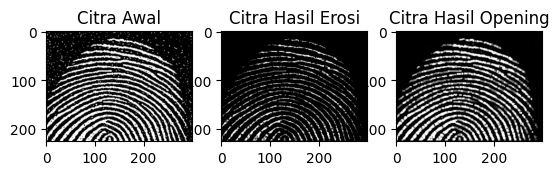

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Baca citra sidik jari
img = cv2.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/fingerprint.png')

# Konversi ke citra grayscale
gray = color.rgb2gray(img)

# Tampilkan citra asli
plt.subplot(131)
plt.imshow(gray, cmap='gray')
plt.title('Citra Awal')

# Operasi erosi
sed = np.array([
                  [0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]
              ], dtype=np.uint8)
eroded = np.zeros_like(gray)
for i in range(1, gray.shape[0]-1):
    for j in range(1, gray.shape[1]-1):
        temp = gray[i-1:i+2, j-1:j+2]
        eroded[i, j] = np.min(temp)

# Tampilkan citra hasil erosi
plt.subplot(132)
plt.imshow(eroded, cmap='gray')
plt.title('Citra Hasil Erosi')

# Operasi dilasi
dilated = np.zeros_like(eroded)
for i in range(1, eroded.shape[0]-1):
    for j in range(1, eroded.shape[1]-1):
        temp = eroded[i-1:i+2, j-1:j+2]
        dilated[i, j] = np.max(temp)

# Tampilkan citra hasil dilasi
plt.subplot(133)
plt.imshow(dilated, cmap='gray')
plt.title('Citra Hasil Opening')

plt.show()

7. b. SE Square Opening dengan Library

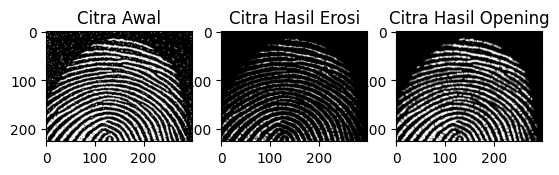

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra sidik jari
img = cv2.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/fingerprint.png', 0)

# Menampilkan citra asli
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')

# Membuat kernel 3x3 berbentuk square
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi erosi menggunakan fungsi cv2.erode()
erosion = cv2.erode(img, kernel, iterations=1)

# Menampilkan citra hasil erosi
plt.subplot(132)
plt.imshow(erosion, cmap='gray')
plt.title('Citra Hasil Erosi')

# Melakukan operasi opening menggunakan fungsi cv2.morphologyEx()
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Menampilkan citra hasil opening
plt.subplot(133)
plt.imshow(opening, cmap='gray')
plt.title('Citra Hasil Opening')

plt.show()

8. a. SE Square Closing Tanpa Library

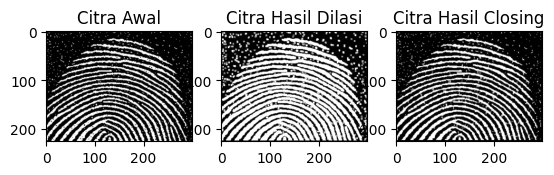

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Baca citra sidik jari
img = cv2.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/fingerprint.png')

# Konversi ke citra grayscale
gray = color.rgb2gray(img)

# Tampilkan citra asli
plt.subplot(131)
plt.imshow(gray, cmap='gray')
plt.title('Citra Awal')

# Operasi dilasi
kernel = np.ones((3, 3))
dilated = np.zeros_like(gray)
for i in range(1, gray.shape[0]-1):
    for j in range(1, gray.shape[1]-1):
        temp = gray[i-1:i+2, j-1:j+2]
        dilated[i, j] = np.max(temp)

# Tampilkan citra hasil dilasi
plt.subplot(132)
plt.imshow(dilated, cmap='gray')
plt.title('Citra Hasil Dilasi')

# Operasi erosi
eroded = np.zeros_like(dilated)
for i in range(1, dilated.shape[0]-1):
    for j in range(1, dilated.shape[1]-1):
        temp = dilated[i-1:i+2, j-1:j+2]
        eroded[i, j] = np.min(temp)

# Tampilkan citra hasil closing
plt.subplot(133)
plt.imshow(eroded, cmap='gray')
plt.title('Citra Hasil Closing')

plt.show()

8. a. SE Square Closing Dengan Library

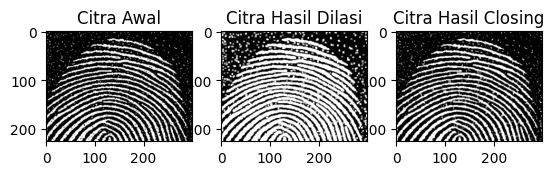

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra sidik jari
img = cv2.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/fingerprint.png', 0)

# Menampilkan citra asli
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')

# Membuat kernel 3x3 berbentuk square
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi dilasi menggunakan fungsi cv2.dilate()
dilation = cv2.dilate(img, kernel, iterations=1)

# Menampilkan citra hasil dilasi
plt.subplot(132)
plt.imshow(dilation, cmap='gray')
plt.title('Citra Hasil Dilasi')

# Melakukan operasi closing menggunakan fungsi cv2.morphologyEx()
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# Menampilkan citra hasil closing
plt.subplot(133)
plt.imshow(closing, cmap='gray')
plt.title('Citra Hasil Closing')

plt.show()